### 统计推断：Bootstrap 置信区间

本笔记本演示了如何使用引导方法构建统计数据的置信区间。 我们还将检查 CI 的覆盖概率。

- 构建 Bootstrap 置信区间
- 检查覆盖概率
- Bootstrap CI 相关系数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generate some random data
data = np.random.randn(100)*10 + 20

data

array([20.14846988, 13.40823552, 13.32946651, 19.12680721, 17.52762493,
       45.23921971, 34.37879933, 18.87102583, 15.96800357, 25.24450873,
       20.40852062, 22.59343075, 34.79216096, 16.89194103, 28.92760549,
       18.84044456, 18.28049028, 20.10881674,  7.68688806, 10.37430632,
       20.3172587 , 26.42390427, 39.13238623,  7.40129486,  4.38548135,
       23.36831945, 26.89693477, 15.4169132 , 36.71645312,  7.00419646,
       15.15546063, 13.59549372, 18.88764964, 30.84743651, 31.79246417,
        1.91489133, 19.86336078, 21.92654346, 20.24120974, 19.78252461,
       29.67569607, 22.84760632,  5.64987682,  8.71363322, 21.88605373,
       23.48926653, 23.0107298 , 39.27012335, 13.98657903, 33.82055816,
       20.11463245, 21.64808896, -0.70135753, 31.30912412, -1.16449383,
       24.14380325, 35.47126313, 17.98800236, 18.58904375,  5.67235521,
       21.28026186, 19.49719148, 41.08458071, 10.09613031, 31.31805292,
       29.79117483, 13.69039686, 16.06187024, 35.57088589, 16.34

(array([ 6., 13., 16., 30., 13.,  9., 11.,  2.]),
 array([-1.29705377,  4.51998042, 10.3370146 , 16.15404879, 21.97108297,
        27.78811715, 33.60515134, 39.42218552, 45.23921971]),
 <BarContainer object of 8 artists>)

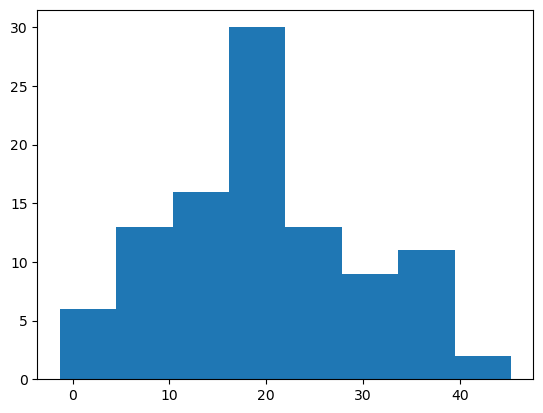

In [3]:
plt.hist(data,bins=8)

In [4]:
print("Population mean is:", np.mean(data))

print("Population variance is:", np.var(data))

Population mean is: 19.73510302232665
Population variance is: 105.44761217481347


In [5]:
#One sample with 30 numbers, this is what we have in hand.

sample_30 = np.random.choice(data, 30, replace=True)

sample_30

array([30.84743651, 39.13238623, 34.37879933, 13.32946651, 13.69039686,
        9.1263876 ,  6.87104071, 31.79246417, 10.98409074, 18.58904375,
       18.87102583, 10.23985703, 13.59549372, 25.24450873, 26.42390427,
        5.08193247, 31.79246417, 28.92760549, 15.4169132 ,  8.71363322,
        7.00419646, 25.26497935,  5.51315604, 22.28515871, 15.15546063,
       30.84743651, 24.14380325, 13.98657903, 25.24450873,  0.90316588])

1.构建Bootstrap CI

In [6]:
#Define a bootstrap function:
def bootstrap(sample):
    
    bootstrap_mean_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = np.random.choice(sample, len(sample), replace=True)
        
        #compute sub-sample mean
        subsample_mean = np.mean(subsample)

        bootstrap_mean_list.append(subsample_mean)
    
    #Calculatet the mean and std of the bootstrap sampling distribution
    bootstrap_mean = np.mean(bootstrap_mean_list)
    boostrap_std = np.std(bootstrap_mean_list)
    
    # mean +- 2*std for an approximate 95% CI.
    CI = [(bootstrap_mean - 2*boostrap_std), (bootstrap_mean + 2*boostrap_std)]
    
    return CI,bootstrap_mean_list
    

In [7]:
#Do the same thing for the percentile-based method:
def bootstrap_perc(sample):
    
    bootstrap_mean_list = []
    
    for i in range(1000):
        #generate a re-sample with the original sample size, with replacement
        subsample = np.random.choice(sample, len(sample), replace=True)
        
        #compute sample mean
        subsample_mean = np.mean(subsample)

        bootstrap_mean_list.append(subsample_mean)
    
    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_mean_list, 2.5), 
          np.percentile(bootstrap_mean_list, 97.5)]
    
    return percentile_CI,bootstrap_mean_list
    

In [8]:
#Define a anlytical based function:
def anlytical(sample):
    
    sample_mean = np.mean(sample)
    
    err_of_margin = 2*np.std(sample)/np.sqrt(len(sample))
    
    # mean +- 2*std for an approximate 95% CI.
    CI_lower = sample_mean - err_of_margin
    CI_upper = sample_mean + err_of_margin
    
    CI = [CI_lower, CI_upper]
    
    return CI

比较引导 CI 与分析 CI：

In [9]:
bootstrap_CI, bootstrap_mean_list = bootstrap(sample_30)
bootstrap_CI_perc, bootstrap_mean_list_perc = bootstrap_perc(sample_30)
analytical_CI = anlytical(sample_30)

In [10]:
print("95% analytical CI: ", analytical_CI)
print("95% bootstrap CI: ", bootstrap_CI)
print("95% percentile-based bootstrap CI: ", bootstrap_CI_perc)

95% analytical CI:  [15.105707709695746, 22.45411196607375]
95% bootstrap CI:  [15.166149117216644, 22.429589185859715]
95% percentile-based bootstrap CI:  [15.128839804780965, 22.302901561304623]


2. 测试 95% CI 的覆盖率
- 引导程序
- 基于百分位数的 Bootstrap
- 分析

In [11]:
%%time
#generate samples for multiple times
counter = 0
counter_perc = 0
true_mean = np.mean(data)

for i in range(1000):
    #generate a sample with 30 numbers
    sample = np.random.choice(data, 30, replace=True)
    
    #For each sample, we compute the two CIs:
    ci,_ = bootstrap(sample)
    perc_ci,_ = bootstrap_perc(sample)
    analytical_ci = anlytical(sample)
    
    #Check the coverage
    if ci[0] <= true_mean <= ci[1]:
        counter = counter + 1
        
    if perc_ci[0] <= true_mean <= perc_ci[1]:
        counter_perc = counter_perc + 1

CPU times: total: 28.3 s
Wall time: 2min 6s


In [12]:
print("Number of times 95% bootstrap CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% bootstrap CI covered the population mean: 944 out of 1000


In [13]:
print("Number of times 95% percentile-based bootstrap CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% percentile-based bootstrap CI covered the population mean: 944 out of 1000


In [14]:
print("Number of times 95% analytical CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% analytical CI covered the population mean: 944 out of 1000


3. 相关系数的 Bootstrap 置信区间

In [15]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
df = pd.read_csv(url)
df = df.dropna()

d:\work\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0, 0.5, 'Acceleration')

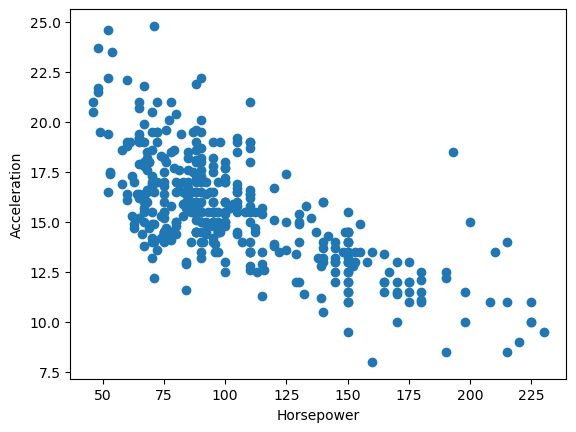

In [16]:
from scipy.stats import *

plt.scatter(df.horsepower, df.acceleration)
plt.xlabel("Horsepower")
plt.ylabel("Acceleration")

In [17]:
print("Pearson:",pearsonr(df.horsepower, df.acceleration))

Pearson: (-0.6891955103342369, 1.5818862297814436e-56)


In [18]:
sample_car = df.sample(frac=0.3,replace=True)
sample_car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m
194,22.5,6,232.0,90.0,3085,17.6,76,usa,amc hornet
380,36.0,4,120.0,88.0,2160,14.5,82,japan,nissan stanza xe
142,26.0,4,79.0,67.0,1963,15.5,74,europe,volkswagen dasher
312,37.2,4,86.0,65.0,2019,16.4,80,japan,datsun 310
...,...,...,...,...,...,...,...,...,...
271,23.2,4,156.0,105.0,2745,16.7,78,usa,plymouth sapporo
136,16.0,8,302.0,140.0,4141,14.0,74,usa,ford gran torino
332,29.8,4,89.0,62.0,1845,15.3,80,europe,vokswagen rabbit
272,23.8,4,151.0,85.0,2855,17.6,78,usa,oldsmobile starfire sx


In [19]:
print("Pearson:",pearsonr(sample_car.horsepower, sample_car.acceleration))

Pearson: (-0.7670736293678354, 4.176876123725007e-24)


In [20]:
#Define a bootstrap function:
np.random.seed(222)
def bootstrap_pearson(sample_car):
    
    bootstrap_cor_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = sample_car.sample(len(sample), replace=True)
        
        #compute correlation
        sample_cor = pearsonr(subsample.horsepower, subsample.acceleration)[0]

        bootstrap_cor_list.append(sample_cor)
    
    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_cor_list, 2.5), 
          np.percentile(bootstrap_cor_list, 97.5)]
    
    return percentile_CI
    

In [21]:
bootstrap_pearson(sample_car)

[-0.897486157722385, -0.49473536389623324]

In [22]:
print("95% confidence interval of the Pearson correlation coefficient is:",
     "[-0.855 to -0.606]")


95% confidence interval of the Pearson correlation coefficient is: [-0.855 to -0.606]


我们有 95% 的信心认为人群中 HP 和 ACC 的真实相关性在 -0.855 到 -0.606 之间。

在这种情况下，CI 不覆盖 0，这意味着总体相关系数不为零。 因此，我们从样本中观察到的负趋势不仅仅是因为抽样变化，而是因为总体中真正的相关性是负的。